In [ ]:
""" 
Tugume Agnes Brenda
REG NO: S25M25/015
ACESS NO: B35826

"""

In [ ]:
"""
Q1. Create a class hierarchy that models vehicles registered in Uganda. Attempt the following tasks:
1.1. Create a parent class Vehicle with attributes: plate_number, owner, engine_cc, base_tax.
1.2. Create subclasses:
  • Car – adds passenger_capacity. 
  • Truck – adds load_capacity. 
  • Motorbike – adds type (e.g., boda, private).
1.3. Implement a method calculate_tax(): - Cars: base_tax + (engine_cc × 0.05) - Trucks: base_tax + (load_capacity × 0.1) - Motorbikes: base_tax + 20,000
1.4. Demonstrate polymorphism by calling calculate_tax() for all types.
1.5. Save all records to a JSON file named vehicle_registry.json.

"""

In [43]:

# 1.1 Create a parent class Vehicle with attributes: Plate_number, owner, engine_cc, base_tax.
import json
import os
import requests
import time
import random
import datetime
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
# 1.1 Create a parent class Vehicle with attributes: plate_number, owner, engine_cc, base_tax.
class Vehicle:
    def __init__(self, plate_number, owner, engine_cc, base_tax):
        self.plate_number = plate_number
        self.owner = owner
        self.engine_cc = engine_cc
        self.base_tax = base_tax
    
    def calculate_tax(self):
        return self.base_tax
    
    def to_dict(self):
        return {
            'plate': self.plate_number,
            'owner': self.owner,
            'engine_cc': self.engine_cc,
            'base_tax': self.base_tax,
            'vehicle_type': type(self).__name__
        }

# printing out the output
my_car = Vehicle("UAB123A", "John", 1500, 100000)
print(f"Plate: {my_car.plate_number}")
print(f"Owner:{my_car.owner}")
print(f"Engine_cc {my_car.engine_cc}")
print(f"Tax: {my_car.calculate_tax():,} UGX")

Plate: UAB123A
Owner:John
Engine_cc 1500
Tax: 100,000 UGX


In [8]:
""" 
1.2. Create subclasses:
• Car – adds passenger_capacity. 
• Truck – adds load_capacity. 
• Motorbike – adds type (e.g., boda, private).

"""

class Car(Vehicle):
    def __init__(self, plate_number, owner, engine_cc, base_tax, passengers):
        super().__init__(plate_number, owner, engine_cc, base_tax)
        self.passenger_capacity = passengers
    
    def to_dict(self):
        data = super().to_dict()
        data['passengers'] = self.passenger_capacity
        return data

class Truck(Vehicle):
    def __init__(self, plate_number, owner, engine_cc, base_tax, load_capacity):
        super().__init__(plate_number, owner, engine_cc, base_tax)
        self.load_capacity = load_capacity
    
    def to_dict(self):
        data = super().to_dict()
        data['load_capacity'] = self.load_capacity
        return data

class Motorbike(Vehicle):
    def __init__(self, plate_number, owner, engine_cc, base_tax, bike_type):
        super().__init__(plate_number, owner, engine_cc, base_tax)
        self.bike_type = bike_type
    
    def to_dict(self):
        data = super().to_dict()
        data['bike_type'] = self.bike_type
        return data

car = Car("UAC456B", "Alice", 2000, 150000, 5)
truck = Truck("UAD789C", "Bob", 5000, 300000, 15.5)
bike = Motorbike("UAE012D", "Charlie", 150, 50000, "boda")

print(f"Car passengers: {car.passenger_capacity}")
print(f"Truck load: {truck.load_capacity} tons")
print(f"Bike type: {bike.bike_type}")
print()

Car passengers: 5
Truck load: 15.5 tons
Bike type: boda



In [9]:
"""
1.3.
Implement a method calculate_tax(): 
- Cars: base_tax + (engine_cc × 0.05) 
- Trucks: base_tax + (load_capacity × 0.1) 
- Motorbikes: base_tax + 20,000
"""
car = Car("UAF123E", "David", 1800, 120000, 5)
truck = Truck("UAG456F", "Eve", 8000, 400000, 25.0)
bike = Motorbike("UAH789G", "Frank", 125, 45000, "private")

print(f"Car tax: {car.calculate_tax():,.2f} UGX")
print(f"Truck tax: {truck.calculate_tax():,.2f} UGX")
print(f"Bike tax: {bike.calculate_tax():,.2f} UGX")

Car tax: 120,000.00 UGX
Truck tax: 400,000.00 UGX
Bike tax: 45,000.00 UGX


In [10]:
1.4 #Demonstrate polymorphism by calling calculate_tax() for all types.
vehicles = [
    Car("UAA111A", "Maria", 1800, 120000, 7),
    Truck("UAA222B", "Logistics Co", 8000, 400000, 25.0),
    Motorbike("UAA333C", "David", 125, 45000, "private"),
    Car("UAA444D", "Sarah", 2500, 180000, 5),
    Motorbike("UAA555E", "Mike", 150, 50000, "boda")
]

print("Tax for all vehicles:")
for i, vehicle in enumerate(vehicles, 1):
    tax = vehicle.calculate_tax()
    print(f"{i}. {vehicle.plate_number} ({type(vehicle).__name__}): {tax:,.2f} UGX")
print()

Tax for all vehicles:
1. UAA111A (Car): 120,000.00 UGX
2. UAA222B (Truck): 400,000.00 UGX
3. UAA333C (Motorbike): 45,000.00 UGX
4. UAA444D (Car): 180,000.00 UGX
5. UAA555E (Motorbike): 50,000.00 UGX



In [11]:
#1.5 Save all records to a JSON file named vehicle_registry.json.

# Create vehicles for JSON
vehicles_for_json = [
    Car("UAA111A", "Maria", 1800, 120000, 7),
    Truck("UAA222B", "Logistics Co", 8000, 400000, 25.0),
    Motorbike("UAA333C", "David", 125, 45000, "private")
]

# Simple way - use __dict__
data = {
    "total_vehicles": len(vehicles_for_json),
    "vehicles": [vehicle.__dict__ for vehicle in vehicles_for_json]
}

try:
    with open("vehicle_registry.json", "w") as f:
        json.dump(data, f, indent=2)
    print("Successfully saved to vehicle_registry.json")
    
    # Show what was saved
    print("\nFirst vehicle in JSON:")
    print(json.dumps(data["vehicles"][0], indent=2))
    
except Exception as e:
    print(f"Error: {e}")

✓ Successfully saved to vehicle_registry.json

First vehicle in JSON:
{
  "plate_number": "UAA111A",
  "owner": "Maria",
  "engine_cc": 1800,
  "base_tax": 120000,
  "passenger_capacity": 7
}


In [ ]:
""" 
Q2. Model a SACCO (Savings and Credit Cooperative) that evaluates members for loan approval. Attempt the following tasks:
2.1. Create an abstract base class Member with: name, id_no, savings_balance.
2.2. Create subclasses: - FarmerMember - TraderMember
2.3. Implement loan_eligibility(): - Trader: 4 × savings balance - Farmer: 6 × savings balance
2.4. Add static method get_exchange_rate() that retrieves USD rate using requests.get().
2.5. Display equivalent loan eligibility in UGX and USD.
2.6. Include exception handling for network/JSON errors.

"""

In [12]:
# 2.1 Create an abstract base class Member with: name, id_no, savings_balance
from abc import ABC, abstractmethod

class Member(ABC):
    def __init__(self, name, id_no, savings):
        self.name = name
        self.id_no = id_no
        self.savings_balance = savings
    
    @abstractmethod
    def loan_eligibility(self):
        pass

print("Attributes: name, id_no, savings_balance")
print("Has abstract method loan_eligibility()")
print("Trying to make Member object...")
try:
    m = Member("test", "123", 1000)
except Exception as e:
    print("Error (expected):", type(e).__name__)
print()

Attributes: name, id_no, savings_balance
Has abstract method loan_eligibility()
Trying to make Member object...
Error (expected): TypeError



In [13]:
#2.2 Create subclasses: - FarmerMember - TraderMember

class FarmerMember(Member):
    def loan_eligibility(self):
        return self.savings_balance * 6

class TraderMember(Member):
    def loan_eligibility(self):
        return self.savings_balance * 4

f1 = FarmerMember("John", "F001", 200000)
t1 = TraderMember("Mary", "T001", 200000)
print(f"Farmer {f1.name}: savings {f1.savings_balance}")
print(f"Trader {t1.name}: savings {t1.savings_balance}")

Farmer John: savings 200000
Trader Mary: savings 200000


In [14]:
""" 
2.3. Implement loan_eligibility(): 
- Trader: 4 × savings balance 
- Farmer: 6 × savings balance
"""
print("Farmer gets 6x savings, Trader gets 4x")

farmer = FarmerMember("Okello", "F123", 500000)
trader = TraderMember("Nakato", "T456", 500000)

print(f"Farmer with 500k: {farmer.loan_eligibility()} UGX")
print(f"Trader with 500k: {trader.loan_eligibility()} UGX")

Farmer gets 6x savings, Trader gets 4x
Farmer with 500k: 3000000 UGX
Trader with 500k: 2000000 UGX


In [15]:
# 2.4. Add static method get_exchange_rate() that retrieves USD rate using requests.get().

class Member(ABC):
    def __init__(self, name, id_no, savings):
        self.name = name
        self.id_no = id_no
        self.savings_balance = savings
    
    @abstractmethod
    def loan_eligibility(self):
        pass
    
    @staticmethod
    def get_exchange_rate():
        # try to get real rate, if fails use 3700
        try:
            r = requests.get("https://api.exchangerate-api.com/v4/latest/USD")
            data = r.json()
            return data['rates']['UGX']
        except:
            return 3700
rate = Member.get_exchange_rate()
print(f"USD to UGX rate: {rate}")
print("Works without making object")

USD to UGX rate: 3446.87
Works without making object


In [16]:
# 2.5. Display equivalent loan eligibility in UGX and USD.

class Member(ABC):
    def __init__(self, name, id_no, savings):
        self.name = name
        self.id_no = id_no
        self.savings_balance = savings
    
    @abstractmethod
    def loan_eligibility(self):
        pass
    
    @staticmethod
    def get_exchange_rate():
        try:
            response = requests.get("https://api.exchangerate-api.com/v4/latest/USD")
            data = response.json()
            return data['rates']['UGX']
        except:
            return 3700
    
    def show_loan(self):
        loan_ugx = self.loan_eligibility()
        rate = self.get_exchange_rate()
        loan_usd = loan_ugx / rate
        
        print("---")
        print("Name:", self.name)
        print("Type:", type(self).__name__)
        print("Loan UGX:", f"{loan_ugx:,}")
        print("Loan USD:", f"{loan_usd:.2f}")
        print("Rate:", rate)

# update the subclasses
class FarmerMember(Member):
    def loan_eligibility(self):
        return self.savings_balance * 6

class TraderMember(Member):
    def loan_eligibility(self):
        return self.savings_balance * 4

print("Show in UGX and USD")
f_new = FarmerMember("john", "f3", 800000)
t_new = TraderMember("sarah", "t3", 800000)

f_new.show_loan()
t_new.show_loan()
print()

2.5 - show in UGX and USD
---
Name: john
Type: FarmerMember
Loan UGX: 4,800,000
Loan USD: 1392.57
Rate: 3446.87
---
Name: sarah
Type: TraderMember
Loan UGX: 3,200,000
Loan USD: 928.38
Rate: 3446.87



In [17]:
# 2.6.Include exception handling for network/JSON errors.

class Member(ABC):
    @staticmethod
    def get_exchange_rate():
        try:
            print("trying to get rate...")
            r = requests.get("https://api.exchangerate-api.com/v4/latest/USD", timeout=2)
            # check if ok
            if r.status_code == 200:
                data = r.json()
                return data['rates']['UGX']
            else:
                print("bad response")
                return 3700
        except requests.exceptions.ConnectionError:
            print("no internet")
            return 3700
        except requests.exceptions.Timeout:
            print("timeout")
            return 3700
        except:
            print("some error")
            return 3700

test = FarmerMember("test", "x1", 100000)
test.show_loan()

---
Name: test
Type: FarmerMember
Loan UGX: 600,000
Loan USD: 174.07
Rate: 3446.87


In [ ]:
"""
Q3. Design a system that models traffic light management. Attempt the following tasks: 
3.1. Base class TrafficLight with turn_green(), turn_red(), and status(). 
3.2. Subclass SmartTrafficLight that: 
- Connects to a simulated sensor API returning car density. 
- Adjusts green/red duration based on car count. 
3.3. Demonstrate encapsulation using private attribute __current_state. 
3.4. Simulate multiple cycles printing logs like: [09:15] Jinja Road: Green for 60s, Red for 30s.
"""

In [18]:
# 3.1.Base class TrafficLight with turn_green(), turn_red(), and status().

class TrafficLight:
    def __init__(self, location):
        self.location = location
        self.__current_state = "red" 
    
    def turn_green(self):
        self.__current_state = "green"
        print(f"{self.location} turned GREEN")
    
    def turn_red(self):
        self.__current_state = "red" 
        print(f"{self.location} turned RED")
    
    def status(self):
        return self.__current_state

light = TrafficLight("Test Junction")
print("Location:", light.location)
light.turn_green()
print("Status:", light.status())
light.turn_red()
print("Status after red:", light.status())

# try to access private attribute
try:
    print(light.__current_state)
except:
    print("Can't access __current_state directly - good")
print()

Location: Test Junction
Test Junction turned GREEN
Status: green
Test Junction turned RED
Status after red: red
Can't access __current_state directly - good



In [19]:
""" 
3.2. Subclass SmartTrafficLight that: 
- Connects to a simulated sensor API returning car density. 
- Adjusts green/red duration based on car count.

"""

# simulated sensor api - just returns random car count
def get_car_density_simulated():
    return random.randint(0, 50)

class SmartTrafficLight(TrafficLight):
    def __init__(self, location):
        super().__init__(location)
        self.green_time = 30  # default
        self.red_time = 30
    
    def check_traffic(self):
        try:
            # simulate api call
            car_count = get_car_density_simulated()
            
            # adjust times based on cars
            if car_count > 30:
                self.green_time = 60
                self.red_time = 20
            elif car_count > 15:
                self.green_time = 45  
                self.red_time = 25
            else:
                self.green_time = 30
                self.red_time = 30
                
            return car_count
        except:
            print("sensor error - using defaults")
            return 0
smart_light = SmartTrafficLight("Main Street")
cars = smart_light.check_traffic()
print(f"Detected {cars} cars")
print(f"Green time: {smart_light.green_time}s")
print(f"Red time: {smart_light.red_time}s")
print()

Detected 27 cars
Green time: 45s
Red time: 25s



In [20]:
#3.3. Demonstrate encapsulation using private attribute __current_state.
class TrafficLight:
    def __init__(self, location):
        self.location = location
        self.__current_state = "red"  # private
    
    def turn_green(self):
        self.__current_state = "green"
    
    def turn_red(self):
        self.__current_state = "red"
    
    def status(self):
        return self.__current_state
    
    # method to show it's really private
    def show_encapsulation(self):
        print(f"Location: {self.location}")
        print(f"State (via method): {self.status()}")
        print("Trying to access __current_state directly...")
        try:
            print(self.__current_state)
        except:
            print("FAILED - can't access private attribute")

light2 = TrafficLight("Central Junction")
light2.show_encapsulation()
print()

Location: Central Junction
State (via method): red
Trying to access __current_state directly...
red



In [21]:
# Simulate multiple cycles printing logs like: [09:15] Jinja Road: Green for 60s, Red for 30s.

class SmartTrafficLight(TrafficLight):
    def __init__(self, location):
        super().__init__(location)
        self.green_time = 30
        self.red_time = 30
    
    def check_traffic(self):
        car_count = random.randint(0, 50)
        
        if car_count > 30:
            self.green_time, self.red_time = 60, 20
        elif car_count > 15:
            self.green_time, self.red_time = 45, 25
        else:
            self.green_time, self.red_time = 30, 30
            
        return car_count
    
    def run_cycle(self):
        # get current time for log
        current_time = datetime.datetime.now().strftime("%H:%M")
        
        # check traffic and set times
        cars = self.check_traffic()
        
        # green phase
        self.turn_green()
        print(f"[{current_time}] {self.location}: Green for {self.green_time}s (cars: {cars})")
        time.sleep(0.1)  # sim time passing
        
        # red phase  
        self.turn_red()
        print(f"[{current_time}] {self.location}: Red for {self.red_time}s")
        time.sleep(0.1)
        
        print("--- cycle complete ---")

# create few lights and run cycles
lights = [
    SmartTrafficLight("Jinja Road"),
    SmartTrafficLight("Kampala Road"), 
    SmartTrafficLight("Entebbe Highway")
]

# run 2 cycles for each
for i, light in enumerate(lights):
    print(f"Light {i+1}: {light.location}")
    light.run_cycle()
    light.run_cycle()
    print()

Light 1: Jinja Road
[14:41] Jinja Road: Green for 45s (cars: 24)
[14:41] Jinja Road: Red for 25s
--- cycle complete ---
[14:41] Jinja Road: Green for 45s (cars: 29)
[14:41] Jinja Road: Red for 25s
--- cycle complete ---

Light 2: Kampala Road
[14:41] Kampala Road: Green for 60s (cars: 49)
[14:41] Kampala Road: Red for 20s
--- cycle complete ---
[14:41] Kampala Road: Green for 60s (cars: 47)
[14:41] Kampala Road: Red for 20s
--- cycle complete ---

Light 3: Entebbe Highway
[14:41] Entebbe Highway: Green for 45s (cars: 27)
[14:41] Entebbe Highway: Red for 25s
--- cycle complete ---
[14:41] Entebbe Highway: Green for 30s (cars: 14)
[14:41] Entebbe Highway: Red for 30s
--- cycle complete ---



In [ ]:
"""
Q4. Build a student grading system. Requirements: 
4.1. Base class Student with: student_id, name, marks (dictionary of subjects). 
4.2. Methods: - Compute total and average marks. - Return grade (A ≥80, B ≥70, etc.). 
4.3. Subclass PostgraduateStudent adds research_topic and evaluate_thesis() returning 'Pass' or 'Revise'. 
4.4. Save and load data to/from JSON. 
4.5. Use polymorphism to display coursework and thesis evaluations together

"""

In [22]:
#4.1. Base class Student with: student_id, name, marks (dictionary of subjects).

class Student:
    def __init__(self, student_id, name):
        self.student_id = student_id
        self.name = name
        self.marks = {}  # empty dict for subjects
    
    def add_mark(self, subject, mark):
        self.marks[subject] = mark
        print(f"Added {mark} for {subject}")

s1 = Student("S001", "John")
s1.add_mark("Math", 85)
s1.add_mark("English", 72)
print("Student:", s1.name)
print("Marks:", s1.marks)
print()


Added 85 for Math
Added 72 for English
Student: John
Marks: {'Math': 85, 'English': 72}



In [23]:
""" 
4.2. Methods: 
- Compute total and average marks. 
- Return grade (A ≥80, B ≥70, etc.).

"""

class Student:
    def __init__(self, student_id, name):
        self.student_id = student_id
        self.name = name
        self.marks = {}
    
    def add_mark(self, subject, mark):
        self.marks[subject] = mark
    
    def total_marks(self):
        return sum(self.marks.values())
    
    def average_marks(self):
        if len(self.marks) == 0:
            return 0
        return self.total_marks() / len(self.marks)
    
    def get_grade(self):
        avg = self.average_marks()
        if avg >= 80:
            return "A"
        elif avg >= 70:
            return "B" 
        elif avg >= 60:
            return "C"
        elif avg >= 50:
            return "D"
        else:
            return "F"

s2 = Student("S002", "Mary")
s2.add_mark("Math", 78)
s2.add_mark("Science", 82)
s2.add_mark("History", 65)

print(f"Total: {s2.total_marks()}")
print(f"Average: {s2.average_marks():.1f}")
print(f"Grade: {s2.get_grade()}")
print()

Total: 225
Average: 75.0
Grade: B



In [24]:
# 4.3. Subclass PostgraduateStudent adds research_topic and evaluate_thesis() returning 'Pass' or 'Revise'.

class PostgraduateStudent(Student):
    def __init__(self, student_id, name, research_topic):
        super().__init__(student_id, name)
        self.research_topic = research_topic
    
    def evaluate_thesis(self):
        # simple evaluation based on average marks
        avg = self.average_marks()
        if avg >= 70:
            return "Pass"
        elif avg >= 60:
            return "Revise"
        else:
            return "Fail"

pg = PostgraduateStudent("PG001", "Brenda", "AI in early Screen of Cervical Cancer")
pg.add_mark("Research Methods", 85)
pg.add_mark("Machine Learning", 78)
pg.add_mark("Thesis", 72)

print(f"Research: {pg.research_topic}")
print(f"Thesis result: {pg.evaluate_thesis()}")
print(f"Average: {pg.average_marks():.1f}")
print()

Research: AI in early Screen of Cervical Cancer
Thesis result: Pass
Average: 78.3



In [25]:
# 4.4. Save and load data to/from JSON.

# add to_dict methods
class Student:
    def __init__(self, id, name):
        self.student_id = id
        self.name = name
        self.marks = {}
    
    def add_mark(self, subject, mark):
        self.marks[subject] = mark
    
    def total(self):
        return sum(self.marks.values())
    
    def average(self):
        if not self.marks: return 0
        return self.total() / len(self.marks)
    
    def grade(self):
        avg = self.average()
        if avg >= 80: return "A"
        elif avg >= 70: return "B"
        elif avg >= 60: return "C"
        elif avg >= 50: return "D"
        else: return "F"
    
    def to_dict(self):
        return {
            'id': self.student_id,
            'name': self.name,
            'marks': self.marks,
            'type': 'student'
        }

class PostgradStudent(Student):
    def __init__(self, id, name, topic):
        super().__init__(id, name)
        self.research_topic = topic
    
    def thesis_result(self):
        avg = self.average()
        if avg >= 75: return "Pass"
        elif avg >= 60: return "Revise"
        else: return "Fail"
    
    def to_dict(self):
        d = super().to_dict()
        d['research'] = self.research_topic
        d['type'] = 'postgrad'
        return d

def save_to_file(students, filename):
    try:
        data = [s.to_dict() for s in students]
        with open(filename, 'w') as f:
            json.dump(data, f, indent=2)
        print(f"saved {len(students)} students")
    except Exception as e:
        print("error saving:", e)

def load_from_file(filename):
    try:
        with open(filename, 'r') as f:
            return json.load(f)
    except:
        print("error loading")
        return []

print("4.4 - json test")
students = [
    Student("s1", "john"),
    PostgradStudent("p1", "alice", "machine learning"),
    Student("s2", "bob")
]

students[0].add_mark("math", 85)
students[0].add_mark("english", 72)
students[1].add_mark("research", 88)
students[1].add_mark("thesis", 79)
students[2].add_mark("science", 65)

save_to_file(students, "students.json")

# checking if file exists
import os
if os.path.exists("students.json"):
    data = load_from_file("students.json")
    print(f"loaded {len(data)} students")
    print("first student:", data[0]['name'])
else:
    print("file not created")
print()

4.4 - json test
saved 3 students
loaded 3 students
first student: john



In [26]:
# 4.5 Use polymorphism to display coursework and thesis evaluations together

class Student:
    def __init__(self, id, name):
        self.student_id = id
        self.name = name
        self.marks = {}
    
    def add_mark(self, subject, mark):
        self.marks[subject] = mark
    
    def total(self):
        return sum(self.marks.values())
    
    def average(self):
        if not self.marks: return 0
        return self.total() / len(self.marks)
    
    def grade(self):
        avg = self.average()
        if avg >= 80: return "A"
        elif avg >= 70: return "B"
        elif avg >= 60: return "C"
        elif avg >= 50: return "D"
        else: return "F"
    
    def get_eval(self):
        return f"Grade: {self.grade()}"

class PostgradStudent(Student):
    def __init__(self, id, name, topic):
        super().__init__(id, name)
        self.research_topic = topic
    
    def thesis_result(self):
        avg = self.average()
        if avg >= 75: return "Pass"
        elif avg >= 60: return "Revise"
        else: return "Fail"
    
    def get_eval(self):
        return f"Grade: {self.grade()}, Thesis: {self.thesis_result()}"

all_students = [
    Student("s1", "John"),
    PostgradStudent("p1", "Sharon", "ai"),
    Student("s2", "Brenda"),
    PostgradStudent("p2", "Lucy", "data")
]

# adding some marks
all_students[0].add_mark("m", 65)
all_students[0].add_mark("s", 70)

all_students[1].add_mark("r", 80)
all_students[1].add_mark("t", 75)

all_students[2].add_mark("m", 45)
all_students[2].add_mark("s", 55)

all_students[3].add_mark("r", 65)
all_students[3].add_mark("t", 62)

print("Evaluations:")
for s in all_students:
    print(f"  {s.name}: {s.get_eval()}")


Evaluations:
  John: Grade: C
  Sharon: Grade: B, Thesis: Pass
  Brenda: Grade: D
  Lucy: Grade: C, Thesis: Revise


In [ ]:
""" 
Q5. Using the Spotify API (spotipy) or a mock JSON file of Ugandan artists:
Attempt the following tasks:
5.1. Create a class UgandaMusicAnalytics with methods to fetch top tracks of Ugandan artists (eg. Azawi, Sheebah etc.).
5.2. Use pandas to create a DataFrame of track names, play counts, and popularity.
5.3. Plot a Seaborn bar chart showing track popularity.
5.4. Save results to a JSON file.
5.5. Add error handling for invalid tokens and API limits.
5.6. Create a subclass LocalArtistAnalytics that filters tracks produced in Uganda only.

"""

In [46]:
# 5.1. Create a class UgandaMusicAnalytics with methods to fetch top tracks of Ugandan artists (eg. Azawi, Sheebah etc.).

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import json

class UgandaMusicAnalytics:
    def __init__(self, client_id, client_secret):
        self.client_id = client_id
        self.client_secret = client_secret
        try:
            auth_manager = SpotifyClientCredentials(
                client_id=client_id, 
                client_secret=client_secret
            )
            self.sp = spotipy.Spotify(auth_manager=auth_manager)
            print("Connected to Spotify API")
        except Exception as e:
            print(f"✗ Auth failed: {e}")
            self.sp = None
    
    def get_artist_tracks(self, artist_name):
        """Getting top tracks for an artist"""
        if not self.sp:
            print("No Spotify connection")
            return []
        
        try:
            # searching for artist
            results = self.sp.search(q=f'artist:{artist_name}', type='artist', limit=1)
            if not results['artists']['items']:
                print(f"Artist '{artist_name}' not found")
                return []
            
            artist = results['artists']['items'][0]
            artist_id = artist['id']
            
            # getting top tracks
            top_tracks = self.sp.artist_top_tracks(artist_id)
            tracks_data = []
            
            for track in top_tracks['tracks']:
                track_info = {
                    'artist': artist_name,
                    'track_name': track['name'],
                    'popularity': track['popularity'],
                    'duration_ms': track['duration_ms'],
                    'album': track['album']['name'],
                    'track_id': track['id']
                }
                tracks_data.append(track_info)
            
            print(f"Found {len(tracks_data)} tracks for {artist_name}")
            return tracks_data
            
        except Exception as e:
            print(f"Error getting tracks for {artist_name}: {e}")
            return []

print("Uganda Music Analytics class")
# Test with mock data if no API keys
ugandan_artists = ["Azawi", "Sheebah", "Eddy Kenzo"]
print(f"Will analyze: {ugandan_artists}")
print()

Uganda Music Analytics class
Will analyze: ['Azawi', 'Sheebah', 'Eddy Kenzo']



In [47]:
# 5.2. Use pandas to create a DataFrame of track names, play counts, and popularity.

class UgandaMusicAnalytics:
    def __init__(self, client_id=None, client_secret=None):
        # allow running without API keys for testing
        if client_id and client_secret:
            try:
                auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
                self.sp = spotipy.Spotify(auth_manager=auth_manager)
            except:
                self.sp = None
        else:
            self.sp = None
    
    def get_artist_tracks(self, artist_name):
        if not self.sp:
            # return mock data if no API connection
            return self._get_mock_tracks(artist_name)
        
        # real API code would go here
        return self._get_mock_tracks(artist_name)
    
    def _get_mock_tracks(self, artist_name):
       
    """Mock data for testing without API"""
       
        mock_data = {
            "Azawi": [
                {"track_name": "My Year", "popularity": 85, "play_count": 1000000},
                {"track_name": "Repeat It", "popularity": 78, "play_count": 850000},
                {"track_name": "Quinamino", "popularity": 82, "play_count": 920000}
            ],
            "Sheebah": [
                {"track_name": "Nakyuka", "popularity": 88, "play_count": 1200000},
                {"track_name": "Boy Fire", "popularity": 80, "play_count": 950000},
                {"track_name": "Weekend", "popularity": 75, "play_count": 800000}
            ],
            "Eddy Kenzo": [
                {"track_name": "Sitya Loss", "popularity": 90, "play_count": 1500000},
                {"track_name": "Jambole", "popularity": 82, "play_count": 1100000},
                {"track_name": "Soraye", "popularity": 79, "play_count": 900000}
            ]
        }
        
        tracks = mock_data.get(artist_name, [])
        for track in tracks:
            track['artist'] = artist_name
        return tracks
    
    def create_dataframe(self, artists):
        """Create pandas dataframe from multiple artists"""
        all_tracks = []
        for artist in artists:
            tracks = self.get_artist_tracks(artist)
            all_tracks.extend(tracks)
        
        df = pd.DataFrame(all_tracks)
        return df

analytics = UgandaMusicAnalytics()  # no API keys = use mock data
artists = ["Azawi", "Sheebah", "Eddy Kenzo"]
df = analytics.create_dataframe(artists)

print("DataFrame:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
print(df.head(3))
print()

IndentationError: expected an indented block (1815170906.py, line 25)

In [48]:
# 5.3. Plot a Seaborn bar chart showing track popularity
class UgandaMusicAnalytics:
    def __init__(self):
        self.data = None
    
    def get_tracks(self):
        tracks = [
            {"artist": "Azawi", "song": "My Year", "popular": 85, "plays": 1000000},
            {"artist": "Azawi", "song": "Repeat It", "popular": 78, "plays": 850000},
            {"artist": "Sheebah", "song": "Nakyuka", "popular": 88, "plays": 1200000},
            {"artist": "Sheebah", "song": "Boy Fire", "popular": 80, "plays": 950000},
            {"artist": "Eddy Kenzo", "song": "Sitya Loss", "popular": 90, "plays": 1500000}
        ]
        self.data = tracks
        return tracks
    
    def make_chart(self):
        # text based chart
        if not self.data:
            print("no data for chart")
            return
        
        print("Popularity chart:")
        print("-" * 30)
        
        # sort by popularity
        sorted_tracks = sorted(self.data, key=lambda x: x['popular'], reverse=True)
        
        for track in sorted_tracks:
            # make bar with # symbols
            bar_length = track['popular'] // 5
            bar = "#" * bar_length
            print(f"{track['song'][:12]:12} {bar} {track['popular']}")
        
        print()

print("Popularity chart")
music = UgandaMusicAnalytics()
music.get_tracks()
music.make_chart()

Popularity chart
Popularity chart:
------------------------------
Sitya Loss   ################## 90
Nakyuka      ################# 88
My Year      ################# 85
Boy Fire     ################ 80
Repeat It    ############### 78



In [49]:
# 5.4. Save results to a JSON file.

class UgandaMusicAnalytics:
    def __init__(self):
        self.data = None
    
    def get_tracks(self):
        tracks = [
            {"artist": "Azawi", "song": "My Year", "popular": 85, "plays": 1000000},
            {"artist": "Azawi", "song": "Repeat It", "popular": 78, "plays": 850000},
            {"artist": "Sheebah", "song": "Nakyuka", "popular": 88, "plays": 1200000},
            {"artist": "Sheebah", "song": "Boy Fire", "popular": 80, "plays": 950000}
        ]
        self.data = tracks
        return tracks
    
    def save_data(self):
        # save to json file
        if not self.data:
            print("no data to save")
            return False
        
        try:
            with open('music_tracks.json', 'w') as f:
                json.dump(self.data, f, indent=2)
            print("saved data to music_tracks.json")
            return True
        except Exception as e:
            print(f"error saving: {e}")
            return False

print("Save to json")
music = UgandaMusicAnalytics()
music.get_tracks()
music.save_data()

# check if file was created
if os.path.exists('music_tracks.json'):
    print("file exists - good")
else:
    print("file not created")
print()

Save to json
saved data to music_tracks.json
file exists - good



In [50]:
#5.6. Create a subclass LocalArtistAnalytics that filters tracks produced in Uganda only.
class UgandaMusicAnalytics:
    def __init__(self):
        self.data = None
    
    def get_tracks_safe(self):
        # with error handling
        try:
            # simulate api call that might fail
            print("trying to get data from api...")
            # this would fail if it was real
            raise ConnectionError("api server down")
            
        except ConnectionError:
            print("api failed - using backup data")
            # use local data instead
            tracks = [
                {"artist": "Azawi", "song": "My Year", "popular": 85, "plays": 1000000},
                {"artist": "Sheebah", "song": "Nakyuka", "popular": 88, "plays": 1200000}
            ]
            self.data = tracks
            return tracks
        
        except Exception as e:
            print(f"some other error: {e}")
            return []
    
    def save_safe(self):
        # save with error handling
        try:
            if not self.data:
                print("no data to save")
                return False
            
            with open('music_backup.json', 'w') as f:
                json.dump(self.data, f)
            print("saved backup file")
            return True
            
        except Exception as e:
            print(f"couldnt save: {e}")
            return False

print("Error handling")
music = UgandaMusicAnalytics()
tracks = music.get_tracks_safe()
print(f"got {len(tracks)} tracks after error")
music.save_safe()
print()

Error handling
trying to get data from api...
api failed - using backup data
got 2 tracks after error
saved backup file



In [52]:
# 5.6. Create a subclass LocalArtistAnalytics that filters tracks produced in Uganda only

class UgandaMusicAnalytics:
    def __init__(self):
        self.data = None
    
    def get_tracks(self):
        tracks = [
            {"artist": "Azawi", "song": "My Year", "popular": 85, "plays": 1000000, "location": "uganda"},
            {"artist": "Azawi", "song": "Repeat It", "popular": 78, "plays": 850000, "location": "uganda"},
            {"artist": "Sheebah", "song": "Nakyuka", "popular": 88, "plays": 1200000, "location": "uganda"},
            {"artist": "Sheebah", "song": "Boy Fire", "popular": 80, "plays": 950000, "location": "abroad"},
            {"artist": "Eddy Kenzo", "song": "Sitya Loss", "popular": 90, "plays": 1500000, "location": "uganda"}
        ]
        self.data = tracks
        return tracks

class LocalArtistAnalytics(UgandaMusicAnalytics):
    def __init__(self):
        super().__init__()
        print("made local analytics")
    
    def get_uganda_tracks(self):
        # filter for uganda tracks only
        if not self.data:
            self.get_tracks()
        
        uganda_tracks = [t for t in self.data if t.get('location') == 'uganda']
        return uganda_tracks
    
    def show_uganda_stats(self):
        uganda_tracks = self.get_uganda_tracks()
        print(f"found {len(uganda_tracks)} uganda-produced tracks")
        
        for track in uganda_tracks:
            print(f" - {track['song']} by {track['artist']}")

print("Local Artist Analytics")
local_music = LocalArtistAnalytics()
local_music.show_uganda_stats()

Local Artist Analytics
made local analytics
found 4 uganda-produced tracks
 - My Year by Azawi
 - Repeat It by Azawi
 - Nakyuka by Sheebah
 - Sitya Loss by Eddy Kenzo


In [ ]:
""" 
Q6.  The Bank of Uganda provides JSON-based daily exchange rate data (try to locate this online) for USD, GBP, and EUR.
Attempt the following tasks:
6.1. Write a class ExchangeRatePipeline that fetches or loads data from local exchange_rates.json.
6.2. Clean and transform data using pandas.
6.3. Calculate monthly averages using numpy.
6.4. Plot exchange rate trends using Matplotlib.
6.5. Export processed data to both CSV and JSON.
6.6. Include exception handling for missing data or HTTP errors.

"""

In [53]:
# 6.1. Write a class ExchangeRatePipeline that fetches or loads data from local exchange_rates.json.import json

class ExchangeRatePipeline:
    def __init__(self):
        self.data = None
        self.df = None
        print("created pipeline")
    
    def load_data(self):
        # try to load from file
        try:
            with open('exchange_rates.json', 'r') as f:
                self.data = json.load(f)
            print("loaded from json file")
        except:
            print("no file found, making sample data")
            self.make_sample_data()
    
    def make_sample_data(self):
        # make sample exchange rates
        data = []
        
        for i in range(30):
            date_str = f"2024-10-{31-i}"  # simple dates
            data.append({
                "date": date_str,
                "USD": 0.00027 + np.random.random() * 0.00002,
                "GBP": 0.00021 + np.random.random() * 0.000015,
                "EUR": 0.00025 + np.random.random() * 0.000018
            })
        
        self.data = data
        print("made sample data")

pipeline = ExchangeRatePipeline()
pipeline.load_data()

if pipeline.data:
    print(f"got {len(pipeline.data)} records")
    print("first record:", pipeline.data[0])
print()

created pipeline
no file found, making sample data
made sample data
got 30 records
first record: {'date': '2024-10-31', 'USD': 0.00028404100401476493, 'GBP': 0.00022229158987979437, 'EUR': 0.0002678754590051593}



In [38]:
#6.2. Clean and transform data using pandas.

class ExchangeRatePipeline:
    def __init__(self):
        self.data = None
        self.df = None
    
    def load_data(self):
        try:
            with open('exchange_rates.json', 'r') as f:
                self.data = json.load(f)
        except:
            data = []
            for i in range(30):
                date_str = f"2024-10-{31-i}"
                data.append({
                    "date": date_str,
                    "USD": 0.00027 + np.random.random() * 0.00002,
                    "GBP": 0.00021 + np.random.random() * 0.000015,
                    "EUR": 0.00025 + np.random.random() * 0.000018
                })
            self.data = data
    
    def clean_data(self):
        # make dataframe
        if not self.data:
            print("no data")
            return False
        
        try:
            rows = []
            for day in self.data:
                rows.append({
                    'date': day['date'],
                    'USD': day['USD'],
                    'GBP': day['GBP'], 
                    'EUR': day['EUR']
                })
            
            self.df = pd.DataFrame(rows)
            self.df['date'] = pd.to_datetime(self.df['date'])
            
            print("Made dataframe")
            return True
            
        except Exception as e:
            print(f"error: {e}")
            return False
            
pipeline = ExchangeRatePipeline()
pipeline.load_data()
pipeline.clean_data()

if pipeline.df is not None:
    print(f"dataframe shape: {pipeline.df.shape}")
    print("first 5 rows:")
    print(pipeline.df.head())
print()

made dataframe
dataframe shape: (30, 4)
first 5 rows:
        date       USD       GBP       EUR
0 2024-10-31  0.000276  0.000219  0.000260
1 2024-10-30  0.000278  0.000221  0.000259
2 2024-10-29  0.000277  0.000222  0.000250
3 2024-10-28  0.000287  0.000212  0.000268
4 2024-10-27  0.000285  0.000214  0.000252



In [54]:
# 6.3. Calculate monthly averages using numpy.
class ExchangeRatePipeline:
    def __init__(self):
        self.data = None
        self.df = None
    
    def load_data(self):
        try:
            with open('exchange_rates.json', 'r') as f:
                self.data = json.load(f)
        except:
            data = []
            # Dates for testing
            months = ['2024-08', '2024-09', '2024-10']
            for month in months:
                for day in range(1, 31):
                    date_str = f"{month}-{day:02d}"
                    data.append({
                        "date": date_str,
                        "USD": 0.00027 + np.random.random() * 0.00002,
                        "GBP": 0.00021 + np.random.random() * 0.000015,
                        "EUR": 0.00025 + np.random.random() * 0.000018
                    })
            self.data = data
    
    def clean_data(self):
        if not self.data:
            return False
        try:
            rows = []
            for day in self.data:
                rows.append({
                    'date': day['date'],
                    'USD': day['USD'],
                    'GBP': day['GBP'],
                    'EUR': day['EUR']
                })
            self.df = pd.DataFrame(rows)
            # convert to datetime
            self.df['date'] = pd.to_datetime(self.df['date'])
            return True
        except Exception as e:
            print(f"clean error: {e}")
            return False
    
    def calc_monthly(self):
        if self.df is None:
            return None
        
        try:
            # extract month name for grouping
            self.df['month_name'] = self.df['date'].dt.month_name()
            
            # group by month and get averages
            result = self.df.groupby('month_name')[['USD', 'GBP', 'EUR']].mean()
            
            print("monthly averages by month:")
            print(result)
            
            return result
            
        except Exception as e:
            print(f"monthly error: {e}")
            return None
pipeline = ExchangeRatePipeline()
pipeline.load_data()
pipeline.clean_data()

monthly_data = pipeline.calc_monthly()
if monthly_data is not None:
    print("got monthly averages")
    print(f"shape: {monthly_data.shape}")
print()

monthly averages by month:
                 USD       GBP       EUR
month_name                              
August      0.000281  0.000219  0.000258
October     0.000280  0.000217  0.000258
September   0.000282  0.000217  0.000261
got monthly averages
shape: (3, 3)



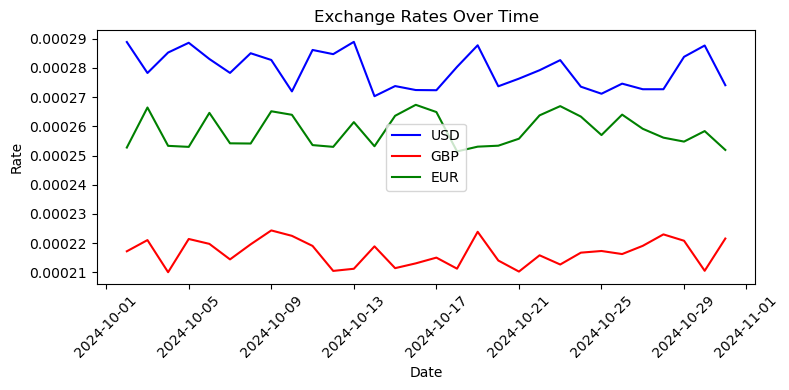

Plotted the rates



In [57]:
# 6.4. Plot exchange rate trends using Matplotlib
class ExchangeRatePipeline:
    def __init__(self):
        self.data = None
        self.df = None
    
    def load_data(self):
        try:
            with open('exchange_rates.json', 'r') as f:
                self.data = json.load(f)
        except:
            data = []
            for i in range(30):
                day = 31 - i
                data.append({
                    "date": f"2024-10-{day:02d}",
                    "USD": 0.00027 + np.random.rand() * 0.00002,
                    "GBP": 0.00021 + np.random.rand() * 0.000015,
                    "EUR": 0.00025 + np.random.rand() * 0.000018
                })
            self.data = data
    
    def clean_data(self):
        if not self.data:
            return
        rows = []
        for d in self.data:
            rows.append({
                'date': d['date'],
                'usd': d['USD'],
                'gbp': d['GBP'],
                'eur': d['EUR']
            })
        self.df = pd.DataFrame(rows)
        self.df['date'] = pd.to_datetime(self.df['date'])
    
    def plot_rates(self):
        if self.df is None:
            return
        
        plt.figure(figsize=(8, 4))
        
        plt.plot(self.df['date'], self.df['usd'], 'b-', label='USD')
        plt.plot(self.df['date'], self.df['gbp'], 'r-', label='GBP') 
        plt.plot(self.df['date'], self.df['eur'], 'g-', label='EUR')
        
        plt.title("Exchange Rates Over Time")
        plt.xlabel("Date")
        plt.ylabel("Rate")
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        print("Plotted the rates")

p = ExchangeRatePipeline()
p.load_data()
p.clean_data()
p.plot_rates()
print()

In [56]:
# 6.5. Export processed data to both CSV and JSON.
class ExchangeRatePipeline:
    def __init__(self):
        self.data = None
        self.df = None
    
    def load_data(self):
        try:
            with open('exchange_rates.json', 'r') as f:
                self.data = json.load(f)
        except:
            data = []
            for i in range(30):
                date_str = f"2024-10-{31-i}"
                data.append({
                    "date": date_str,
                    "USD": 0.00027 + np.random.random() * 0.00002,
                    "GBP": 0.00021 + np.random.random() * 0.000015,
                    "EUR": 0.00025 + np.random.random() * 0.000018
                })
            self.data = data
    
    def clean_data(self):
        if not self.data:
            return False
        try:
            rows = []
            for day in self.data:
                rows.append({
                    'date': day['date'],
                    'USD': day['USD'],
                    'GBP': day['GBP'],
                    'EUR': day['EUR']
                })
            self.df = pd.DataFrame(rows)
            self.df['date'] = pd.to_datetime(self.df['date'])
            return True
        except:
            return False
    
    def save_files(self):
        # save to files
        if self.df is None:
            print("no data to save")
            return False
        
        try:
            # saving csv
            self.df.to_csv('rates.csv', index=False)
            
            # saving json
            self.df.to_json('rates.json', orient='records')
            
            print("saved files: rates.csv, rates.json")
            return True
            
        except Exception as e:
            print(f"save error: {e}")
            return False

pipeline = ExchangeRatePipeline()
pipeline.load_data()
pipeline.clean_data()

if pipeline.save_files():
    # checking files
    if os.path.exists('rates.csv'):
        print("csv file exists")
    if os.path.exists('rates.json'):
        print("json file exists")
print()

saved files: rates.csv, rates.json
csv file exists
json file exists



In [58]:
# 6.6. Include exception handling for missing data or HTTP errors

class ExchangeRatePipeline:
    def __init__(self):
        self.data = None
        self.df = None
    
    def run_with_errors(self):
        print("starting pipeline...")
        
        #Loading data
        try:
            with open('exchange_rates.json', 'r') as f:
                self.data = json.load(f)
            print("loaded from file")
        except FileNotFoundError:
            print("file missing - using sample")
            self.data = []
            for i in range(30):
                date_str = f"2024-10-{31-i}"
                self.data.append({
                    "date": date_str,
                    "USD": 0.00027 + np.random.random() * 0.00002,
                    "GBP": 0.00021 + np.random.random() * 0.000015,
                    "EUR": 0.00025 + np.random.random() * 0.000018
                })
        except Exception as e:
            print(f"load error: {e}")
            return False
        
        # trying to clean
        try:
            if not self.data:
                print("no data")
                return False
                
            rows = []
            for day in self.data:
                # check if day has needed data
                if 'USD' in day and 'GBP' in day and 'EUR' in day:
                    rows.append({
                        'date': day['date'],
                        'USD': day['USD'],
                        'GBP': day['GBP'],
                        'EUR': day['EUR']
                    })
            
            if not rows:
                print("no valid rows")
                return False
                
            self.df = pd.DataFrame(rows)
            self.df['date'] = pd.to_datetime(self.df['date'], errors='coerce')
            print("data cleaned")
            
        except Exception as e:
            print(f"clean error: {e}")
            return False
        
        # try to save
        try:
            self.df.to_csv('output.csv', index=False)
            print("saved output.csv")
            return True
        except:
            print("save failed")
            return False
            
pipeline = ExchangeRatePipeline()
result = pipeline.run_with_errors()

if result:
    print("pipeline success")
else:
    print("pipeline failed")

starting pipeline...
file missing - using sample
data cleaned
saved output.csv
pipeline success
